#**Bitan Majumder**
##TSF Intern - Sept, 2023
###Computer Vision & Internet of Things


Task #2 - Color identification in Images

## Importing necessary libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from google.colab.patches import cv2_imshow

##a function that returns the Hex-code of a color

In [2]:
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

##a function for loading the image and converting it into RGB

In [3]:
def get_image(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

##the function that returns a pie chart denoting the percentage of colors present in the image.
##it uses the Supervised learning algorithm- KMeans Clustering to cluster the colors in the image and detect the percentage of each color

In [4]:
def get_colors(image, number_of_colors, show_chart):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

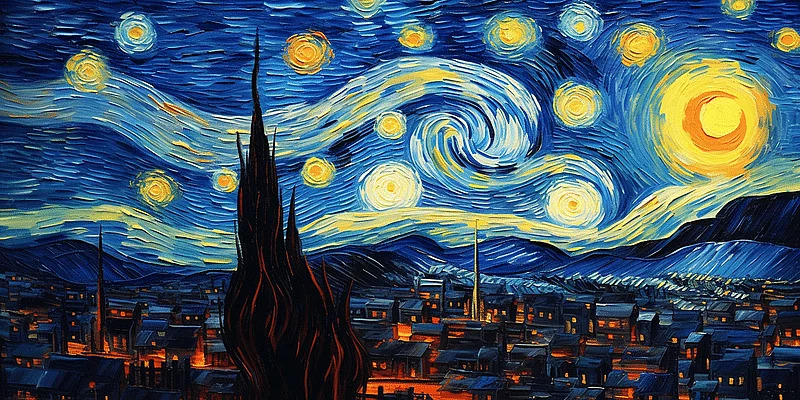

In [5]:
image = cv2.imread('/content/starry_night.jpg')
cv2_imshow(image)

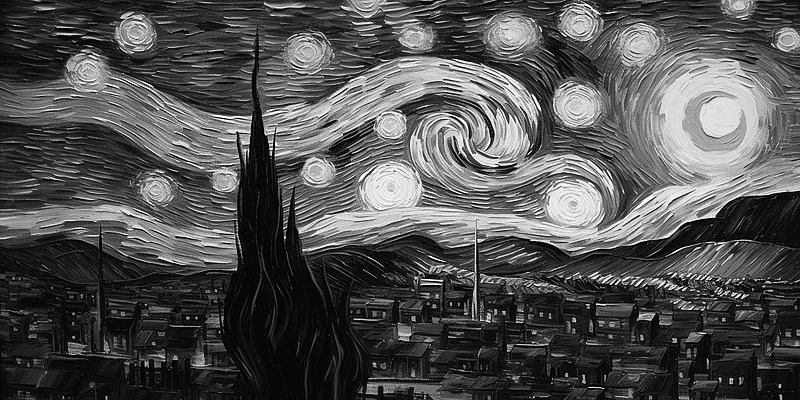

In [6]:
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([222.77641292, 194.86534025,  82.84636678]),
 array([ 27.17348122,  72.36582539, 129.23821065]),
 array([15.49611681, 14.45606946, 24.78846093]),
 array([ 61.3407169 , 122.38848921, 164.94613783]),
 array([207.60117841, 227.29282818, 198.754815  ]),
 array([123.2166393 ,  80.17963875,  49.71767926]),
 array([16.27498994, 36.58989282, 78.89594719]),
 array([124.3913856 , 171.61573374, 177.03381686])]

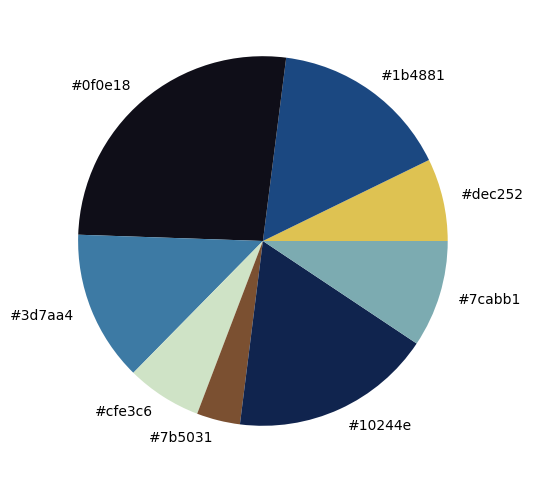

In [7]:
get_colors(get_image(image), 8, True)